

---


# DataSet
Customer Segmentation [link](https://www.kaggle.com/datasets/vetrirah/customer), contains

| Feature         | Description     | Values |
|--------------|-----------|------------|
| ID | Id of customer | 1,2,3,4,... |
| Gender | Gender of the customer  | (Male & Female) |
| Ever_Married |  Marital status of the customer | (Yes & No) |
| Age | Age of the customer | 10,20, 25, 40,.... |
| Graduated | Is the customer a graduate? | (Yes & No) | 
| Profession |Profession of the customer | (Artist, Healthcare,Doctor, Engineer, Lawyer, etc) |
| Work_Experience |  Work Experience |  (1:10) |
| Spending_Score | Spending score of the customer | (Low, Average, High) |
| Family_Size | Number of family members for the customer (including the customer)  | 1,5,2,.. |
| Var_1 | Variable  | (Cat_1, Cat_2, Cat_3, Cat_4) |

  ---


# Conclusion

*  **Dataset** is not distributed properly to the actual segments. i.e, there are poorly patterns.
* **Clustering Techniques** **`KMeans`** has been tried to cluster data better than the current situation.
the **KMeans** give best results based on silhouette score.
* **Classification Algorithms** **`KNN RF SVM AdaBoost`** were used to ensure that **KMeans** work. The performance of **classification Algorithms** on `KMeans` was very high and no ***overfitting*** occurred.
* **TSNE** is used to visualize Data
---



<a id="section-one"></a>
# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as py
import seaborn as sb

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load Data

In [ ]:
trainSet = pd.read_csv('/Train.csv', index_col='ID')
trainSet.head(10)



Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
ID                                                                           
462809    Male           No   22        No     Healthcare              1.0   
462643  Female          Yes   38       Yes       Engineer              NaN   
466315  Female          Yes   67       Yes       Engineer              1.0   
461735    Male          Yes   67       Yes         Lawyer              0.0   
462669  Female          Yes   40       Yes  Entertainment              NaN   
461319    Male          Yes   56        No         Artist              0.0   
460156    Male           No   32       Yes     Healthcare              1.0   
464347  Female           No   33       Yes     Healthcare              1.0   
465015  Female          Yes   61       Yes       Engineer              0.0   
465176  Female          Yes   55       Yes         Artist              1.0   

       Spending_Score  Family_Size  Var_1 Segmentation  
ID                                                      
462809            Low          4.0  Cat_4            D  
462643        Average          3.0  Cat_4            A  
466315            Low          1.0  Cat_6            B  
461735           High          2.0  Cat_6            B  
462669           High          6.0  Cat_6            A  
461319        Average          2.0  Cat_6            C  
460156            Low          3.0  Cat_6            C  
464347            Low          3.0  Cat_6            D  
465015            Low          3.0  Cat_7            D  
465176        Average          4.0  Cat_6            C

In [ ]:
trainCluster = trainSet['Segmentation']
trainSet.drop(['Segmentation'], axis=1, inplace=True)

testSet = pd.read_csv('/Test.csv', index_col='ID')
testCluser = pd.read_csv('/sample_submission.csv', index_col='ID')

# Some ***EDA*** on Data

## Information about Data

In [ ]:
trainSet.head(10)

Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
ID                                                                           
462809    Male           No   22        No     Healthcare              1.0   
462643  Female          Yes   38       Yes       Engineer              NaN   
466315  Female          Yes   67       Yes       Engineer              1.0   
461735    Male          Yes   67       Yes         Lawyer              0.0   
462669  Female          Yes   40       Yes  Entertainment              NaN   
461319    Male          Yes   56        No         Artist              0.0   
460156    Male           No   32       Yes     Healthcare              1.0   
464347  Female           No   33       Yes     Healthcare              1.0   
465015  Female          Yes   61       Yes       Engineer              0.0   
465176  Female          Yes   55       Yes         Artist              1.0   

       Spending_Score  Family_Size  Var_1  
ID                                         
462809            Low          4.0  Cat_4  
462643        Average          3.0  Cat_4  
466315            Low          1.0  Cat_6  
461735           High          2.0  Cat_6  
462669           High          6.0  Cat_6  
461319        Average          2.0  Cat_6  
460156            Low          3.0  Cat_6  
464347            Low          3.0  Cat_6  
465015            Low          3.0  Cat_7  
465176        Average          4.0  Cat_6

In [ ]:
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 462809 to 461879
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 630.3+ KB


In [ ]:
# No of Missing Data And Its Percentage as Whole
pd.DataFrame({'missing':trainSet.isnull().sum(), 
              'percentage':(trainSet.isnull().sum() / np.shape(trainSet)[0]) * 100})

missing  percentage
Gender                 0    0.000000
Ever_Married         140    1.735250
Age                    0    0.000000
Graduated             78    0.966782
Profession           124    1.536936
Work_Experience      829   10.275161
Spending_Score         0    0.000000
Family_Size          335    4.152206
Var_1                 76    0.941993

In [ ]:
trainSet.describe()

Age  Work_Experience  Family_Size
count  8068.000000      7239.000000  7733.000000
mean     43.466906         2.641663     2.850123
std      16.711696         3.406763     1.531413
min      18.000000         0.000000     1.000000
25%      30.000000         0.000000     2.000000
50%      40.000000         1.000000     3.000000
75%      53.000000         4.000000     4.000000
max      89.000000        14.000000     9.000000

By the description above the **age** is `right-skewed` this means that the 
most customers are young.


Because the `mean > median`

In [ ]:
# Number of Unique Values in fields with Most missing data
(len(np.unique(trainSet.Work_Experience))-1 , len(np.unique(trainSet.Family_Size)) - 1)

(15, 9)

Deal with ***Work_Experience*** & ***Family_Size*** as **(ordinal) categorical** features, because the number of unique values is few.
But it also make sense as the nature of these features meant to be repeatative. 

## Working with Features
Main Question, **Is there any combination of features that can distinguish between the Segments?**

In [ ]:
# visualization function to be used regularly for categorical features distribution based on age only
def plot_category(categorical, contenious= trainSet.Age, target= trainCluster):
    """
    Make Some Visualizations
    :param categorical: categorical feature
    :param contenious: numerical feature that want to show its distribution.
    :param target: target feature to make hue
    :return: None
    """

    sb.set_theme(style='ticks')
    py.figure(figsize=(10, 5))
    py.title("Count of each value in " + categorical.name)
    sb.countplot(x=categorical, hue=target); py.show()

    sb.set_theme(style='darkgrid')
    py.figure(figsize=(10, 5))
    py.title("Distribution of " + contenious.name + " based on " + categorical.name)
    sb.stripplot(x=categorical, y=contenious, hue=target); py.show()

    sb.set_theme(style='ticks')
    py.figure(figsize=(10, 5))
    py.title("Distribution of " + contenious.name + " based on " + categorical.name)
    sb.boxenplot(x=categorical, y=contenious, hue=target); py.show()

    pass

### Age

<Axes: xlabel='Age', ylabel='Density'>

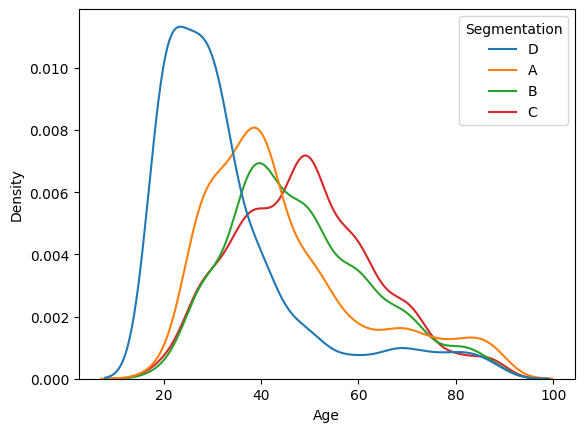

In [ ]:
sb.kdeplot(x=trainSet['Age'], hue=trainCluster)

<Axes: xlabel='Age', ylabel='Count'>

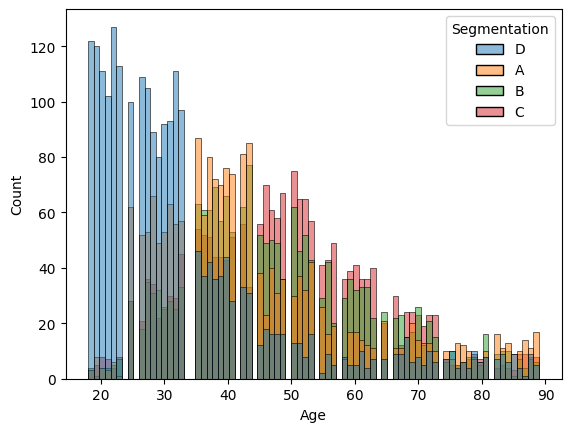

In [ ]:
sb.histplot(x=trainSet['Age'], hue=trainCluster, bins=80)

Can age be the be the sole feature to describe the Customer behavior(segmentation)

In [ ]:
# Let's check age behavious in some random range to see the segementation in customer  
pd.DataFrame(data=[trainCluster[(trainSet['Age'] >= 35) & (trainSet['Age'] <= 45)].value_counts(),
                   trainCluster[(trainSet['Age'] >= 35) & (trainSet['Age'] <= 45)].value_counts() / trainCluster[(trainSet['Age'] >= 35) &
                   (trainSet['Age'] <= 45)].value_counts().sum() * 100], index=['Segmentation', 'Percentage'])

A           B           C           D
Segmentation  722.000000  621.000000  484.000000  346.000000
Percentage     33.225955   28.578003   22.273355   15.922688

> There are many overlaps between Segmentations. because of this, the **age** only not enough for describe behavior of customers.
i.e, can't distinguish between all ***Segments*** using this features.
But can distinguish the ***Segnment*** **D**, in case the **age** is small than ***25*** year.


### Gender

In [ ]:
pd.DataFrame(data=[(trainCluster[(trainSet['Gender'] == 'Male')].value_counts()/ trainCluster.value_counts()) * 100,
                   (trainCluster[(trainSet['Gender'] == 'Female')].value_counts()/ trainCluster.value_counts()) * 100],
             index=['Male', 'Female'])

D          A         C          B
Male    57.716049  53.904665  53.19797  53.659849
Female  42.283951  46.095335  46.80203  46.340151

> In each Segment the Percentage(Distribution) of *males* and *female* is closer (not a sole distingusher in terms of segementation).

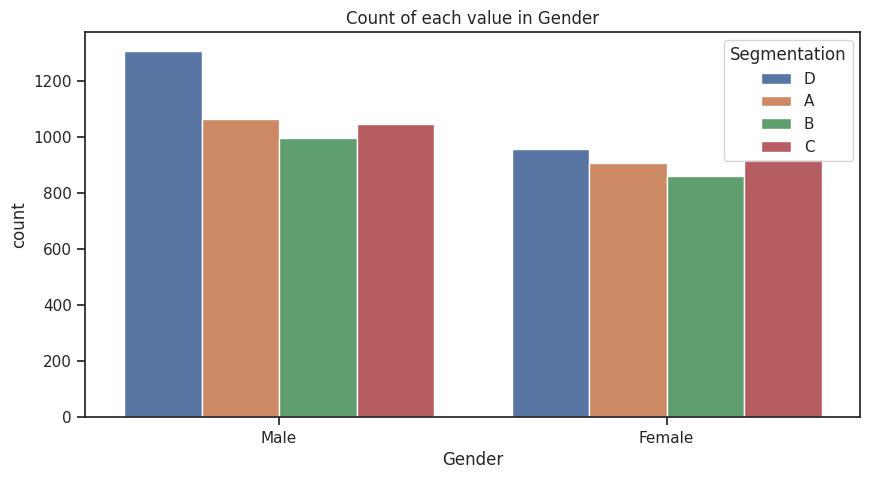

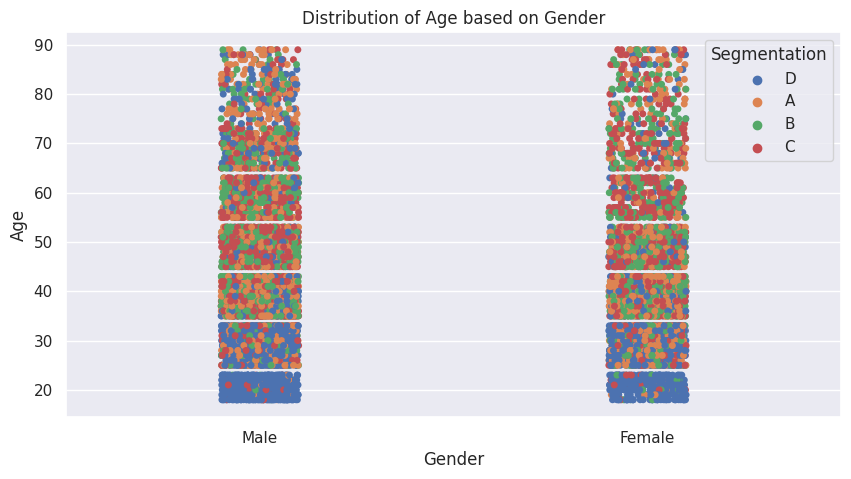

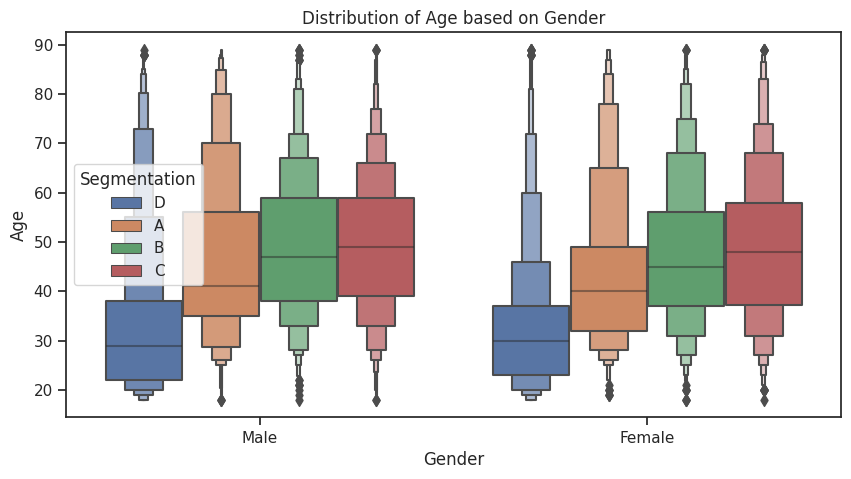

In [ ]:
# Calling the above defined visualization function to analyze the gender
plot_category(categorical=trainSet.Gender)

> + From ***count plot*** the **Gender** can't distinguish between ***Segments*** 
> If Customer is *Male*, can't tell what's his ***Segments*** , because the count of each ***segment*** is closer.
> also in *Female*
> + From ***strip & boxen plots*** The distribution of **age** for each **Gender** in each ***Segment*** is almost the same.
> Can't Solve Overlap problem in age. i.e, can't distinguish between ***Segment*** using these 2-features.

### Ever_Married

In [ ]:
pd.DataFrame(data=[(trainCluster[(trainSet['Ever_Married'] == 'No')].value_counts()/ trainCluster.value_counts()) * 100,
                   (trainCluster[(trainSet['Ever_Married'] == 'Yes')].value_counts()/ trainCluster.value_counts()) * 100],
             index=['Not Married', 'Married'])

A          B          C          D
Not Married  40.618661  25.780409  20.203046  70.855379
Married      57.657201  72.551130  78.629442  26.851852

> In each Segment the Percentage(Distribution) of *married* and *not married, yet* is seperated well, except the segment ***A***. Which has close distributuion

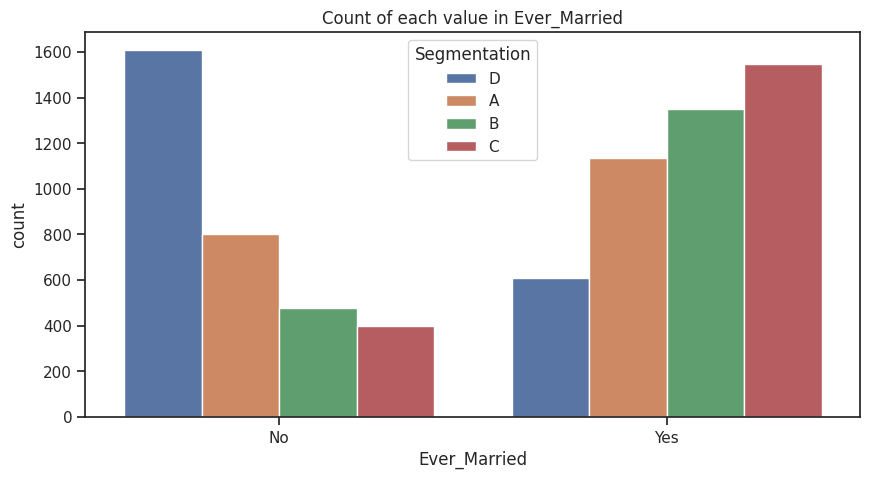

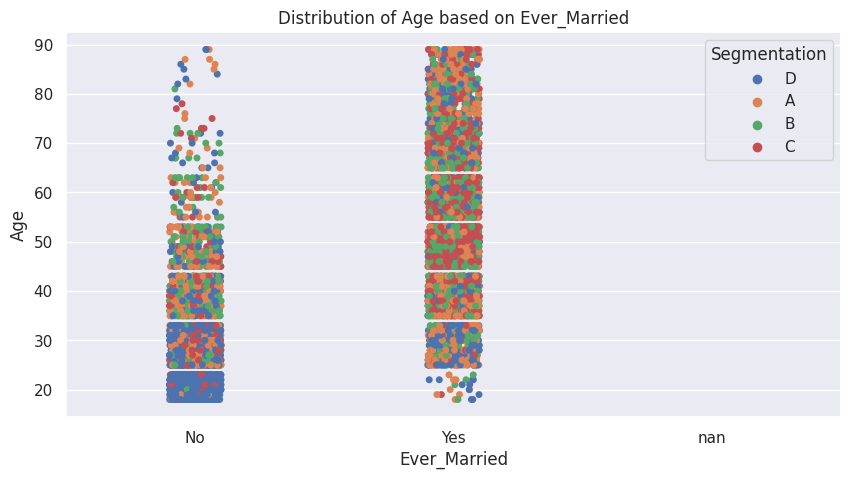

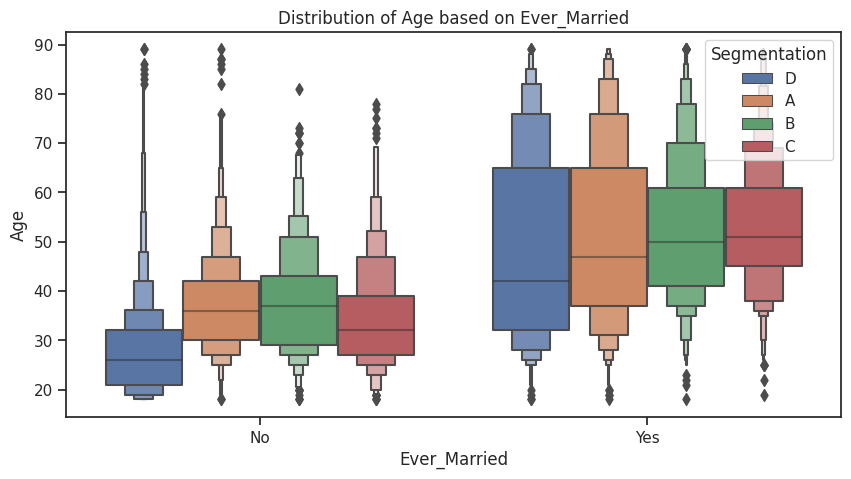

In [ ]:
plot_category(categorical=trainSet.Ever_Married)

> + From ***count plot*** the **Gender** can distinguish between ***Segments*** only in case the customer is *not married*, where
the ***segment*** would be **D** because the count of in this ***segment*** is significantly far from the rest.
> but no in *Female*
> + From ***strip & boxen plots*** The distribution of **age** for each **category** can't distinguish between ***Segments*** using these 2-features.

### Graduated

In [ ]:
pd.DataFrame(data=[(trainCluster[(trainSet['Graduated'] == 'No')].value_counts()/ trainCluster.value_counts()) * 100,
                   (trainCluster[(trainSet['Graduated'] == 'Yes')].value_counts()/ trainCluster.value_counts()) * 100],
             index=['Not Graduated', 'Graduated'])

A          B          C          D
Not Graduated  36.967546  27.341227  17.664975  63.359788
Graduated      61.815416  71.689989  81.573604  35.714286

> In each Segment the Percentage(Distribution) of *graduated* and *not graduated, yet* is seperated well, especially in the segment ***C & B***.

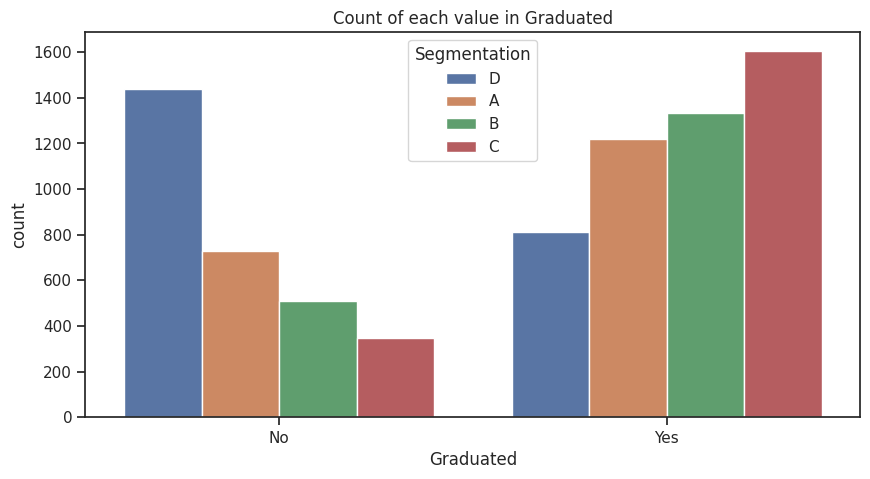

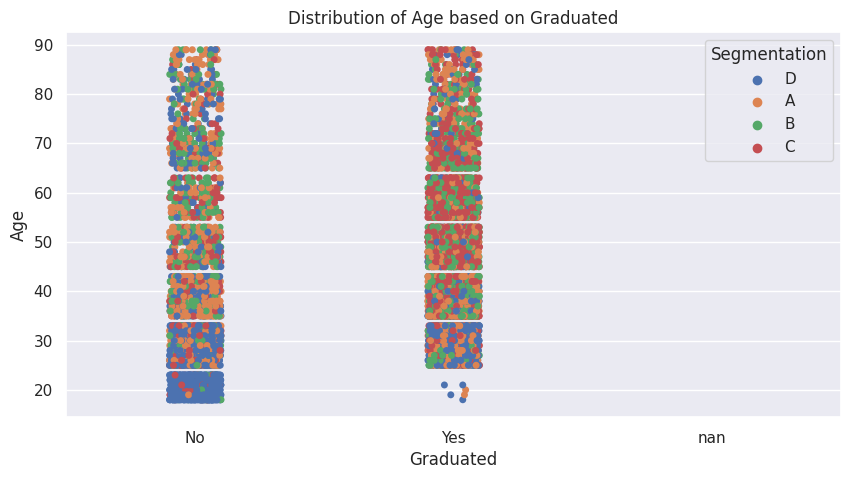

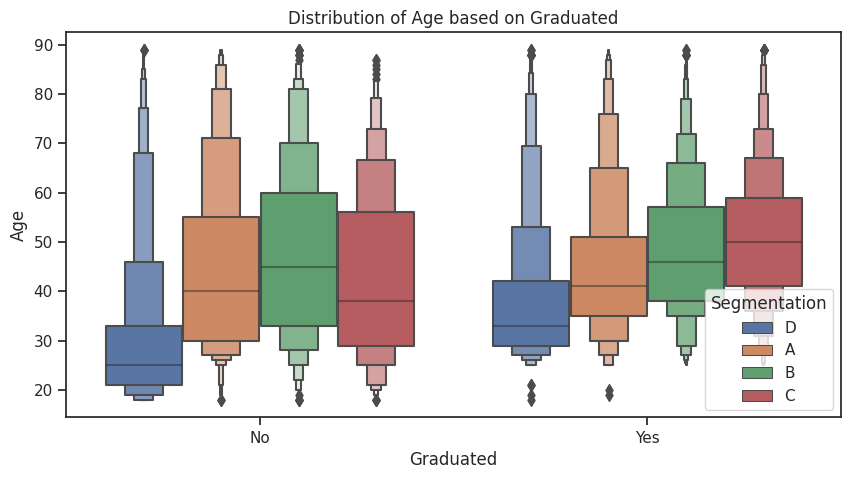

In [ ]:
plot_category(categorical=trainSet.Graduated)

> + Form ***count plot*** the **Graduated** can distinguish between ***Segments*** only in case the customer is *not graduated*, where
the ***segment*** would be **D** because the count of in this ***segment*** is significantly far from the rest.
> but no in *Female*
> + From ***strip & boxen plots*** The distribution of **age** for each **category** can't distinguish between ***Segment*** using these 2-features.

### Profession

In [ ]:
trainSet.Profession.unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [ ]:
pd.DataFrame(data=[(trainCluster[(trainSet['Profession'] == 'Healthcare')].value_counts()/ trainCluster.value_counts()) * 100,
                   (trainCluster[(trainSet['Profession'] == 'Engineer')].value_counts()/ trainCluster.value_counts()) * 100,
                   (trainCluster[(trainSet['Profession'] == 'Lawyer')].value_counts()/ trainCluster.value_counts()) * 100,
                   (trainCluster[(trainSet['Profession'] == 'Entertainment')].value_counts()/ trainCluster.value_counts()) * 100,
                   (trainCluster[(trainSet['Profession'] == 'Artist')].value_counts()/ trainCluster.value_counts()) * 100,
                   (trainCluster[(trainSet['Profession'] == 'Executive')].value_counts()/ trainCluster.value_counts()) * 100,
                   (trainCluster[(trainSet['Profession'] == 'Doctor')].value_counts()/ trainCluster.value_counts()) * 100,
                   (trainCluster[(trainSet['Profession'] == 'Homemaker')].value_counts()/ trainCluster.value_counts()) * 100,
                   (trainCluster[(trainSet['Profession'] == 'Marketing')].value_counts()/ trainCluster.value_counts()) * 100],
             index=trainSet.Profession.unique()[:-1])

A          B          C          D
Healthcare      5.375254   5.435953   7.411168  43.165785
Engineer       13.133874  10.172228   3.807107   7.760141
Lawyer          9.989858   8.503767   7.106599   5.643739
Entertainment  18.509128  11.894510   7.512690   9.479718
Artist         28.296146  40.688913  54.060914   6.040564
Executive       6.338742   9.849300   8.883249   5.114638
Doctor         10.091278   7.696448   7.106599   9.082892
Homemaker       3.701826   2.960172   1.421320   3.968254
Marketing       2.890467   1.614639   1.776650   7.495591

> In segment ***A & B & C***, the dominant profession is **Artist**.
>
> But in segment ***D***, the dominant profession is **Healthcar**. 

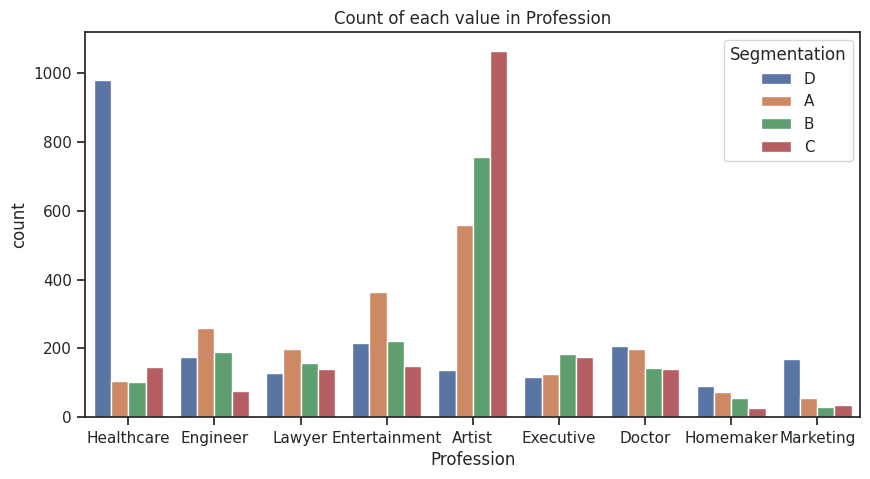

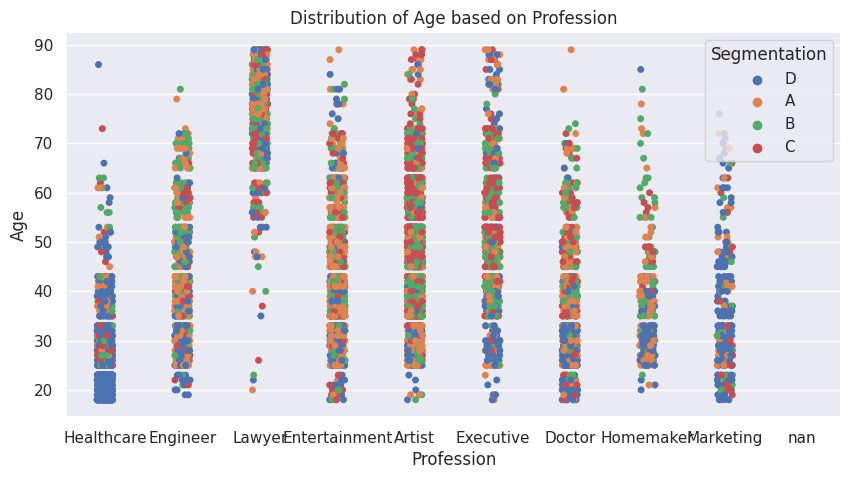

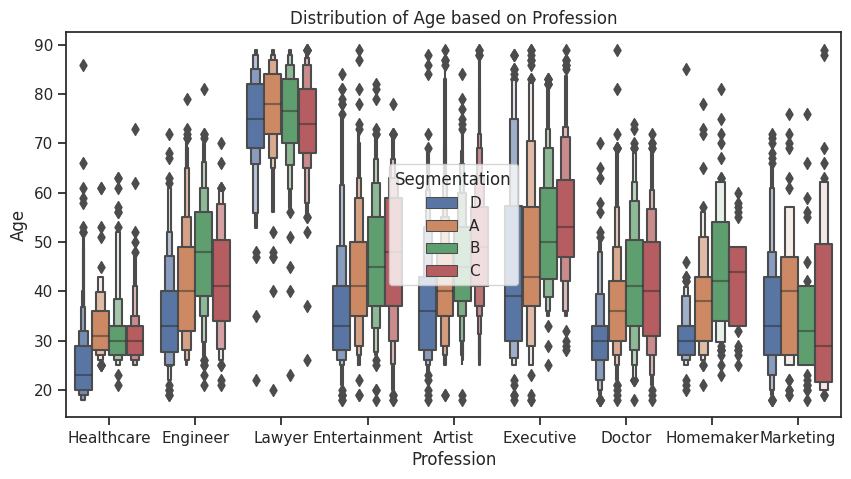

In [ ]:
plot_category(categorical=trainSet.Profession)

> + Form ***count plot***, the **Profession** can distinguish between many ***Segments***, in case the **Profession** is
>> *Healthcare* then the ***Segments*** should be **D**
>>
>> *Artist* then the ***Segments*** should be **C**
>>
>> *Marketng* then the ***Segments*** may be **D**
>>
>> *Entertainment* then the ***Segments*** should be **A**
> + From ***strip & boxen plots***, the small **age** values `less than 25` and *Healthcare* **Profession**, the segment is **D**, but in high **age** values not and can't distinguish between ***Segments***.
 *Layer* **Profession** has diffrient pattern than other **Profession**, thier **age** is high.  

### Work Experience

In [ ]:
trainSet.Work_Experience.unique()

array([ 1., nan,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,
        6., 10., 11.])

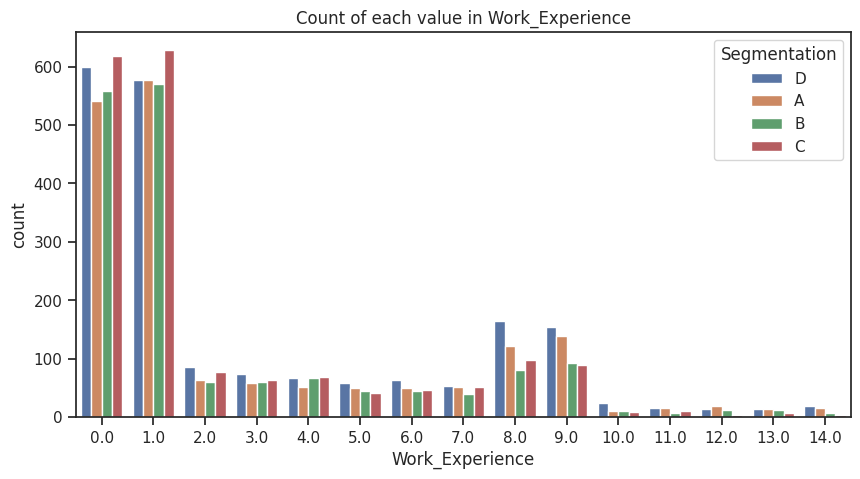

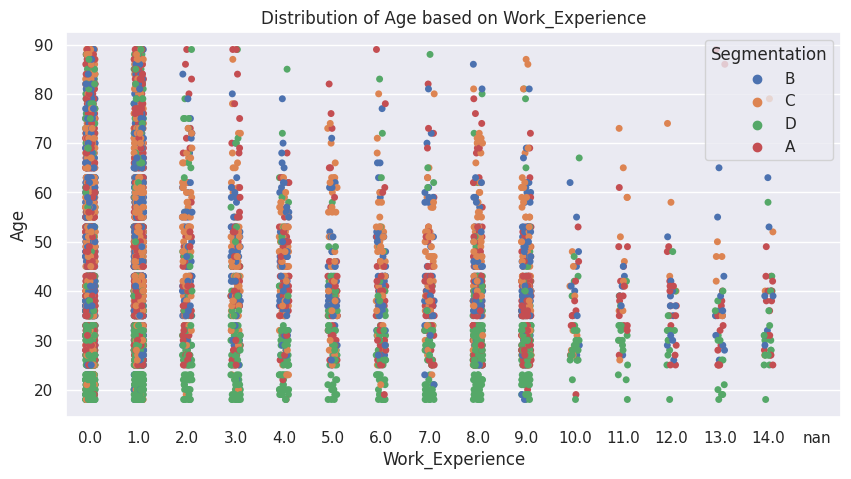

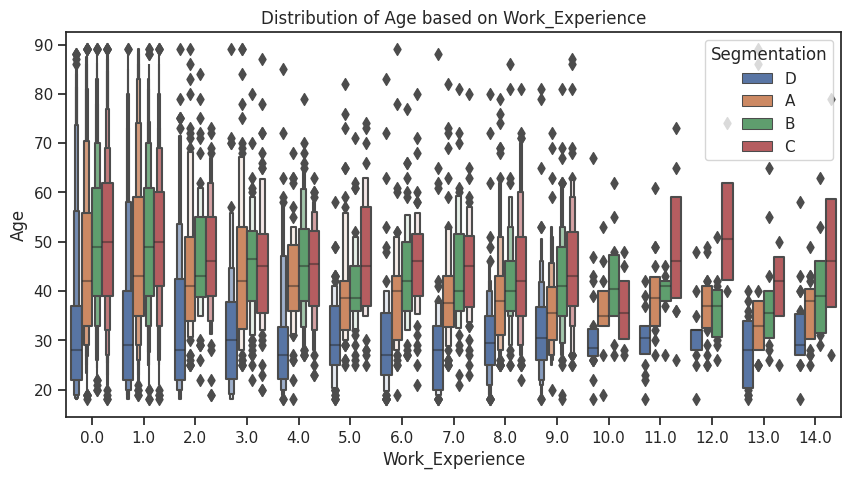

In [ ]:
plot_category(categorical=trainSet.Work_Experience)

> + Form ***count plot***, the **Work Experience** can't distinguish between ***Segments***
> + From ***strip & boxen plots***, when **Work Experience** is `11 12 13 14` and **age** is high the **segment** is **C**. but in other **Work Experience** can't distinguish.

### Spending Score

In [ ]:
trainSet.Spending_Score.unique()

array(['Low', 'Average', 'High'], dtype=object)

In [ ]:
pd.DataFrame(data=[(trainCluster[(trainSet['Spending_Score'] == 'Low')].value_counts()/ trainCluster.value_counts()) * 100,
                   (trainCluster[(trainSet['Spending_Score'] == 'Average')].value_counts()/ trainCluster.value_counts()) * 100,
                   (trainCluster[(trainSet['Spending_Score'] == 'High')].value_counts()/ trainCluster.value_counts()) * 100],
             index=trainSet.Spending_Score.unique())

A          B          C          D
Low      68.864097  47.578041  33.604061  87.037037
Average  17.393509  31.754575  45.837563   6.084656
High     13.742394  20.667384  20.558376   6.878307

> In segment ***D & A***, the dominant Spending Score is **Low**.

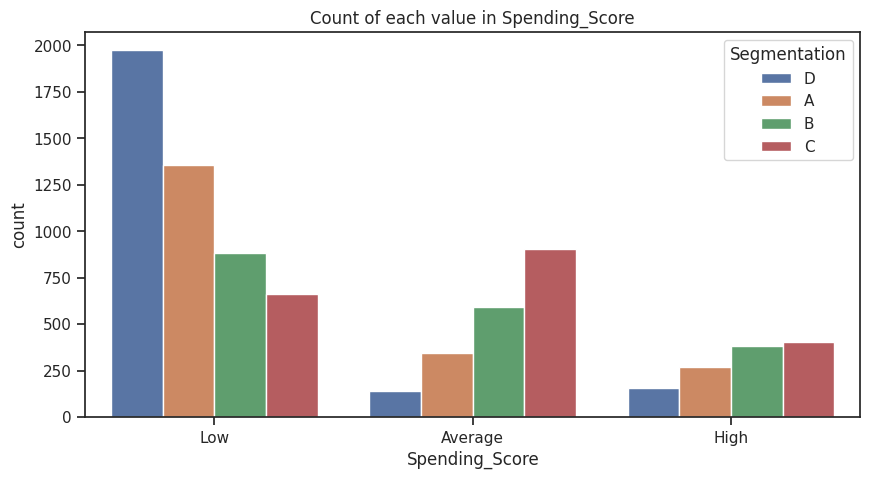

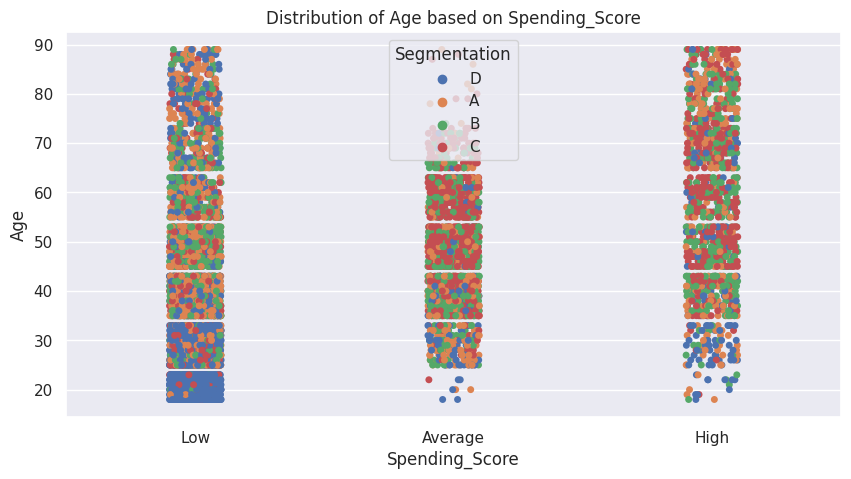

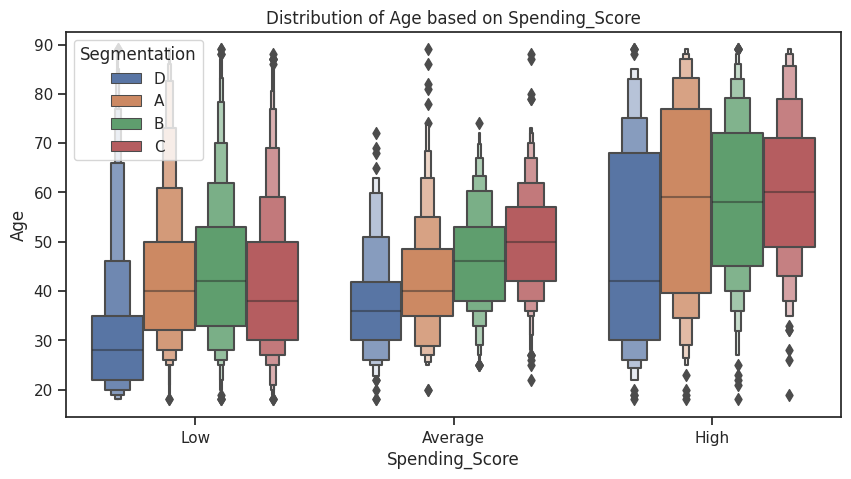

In [ ]:
plot_category(categorical=trainSet.Spending_Score)

> + Form ***count plot***, the **Profession** can distinguish between many ***Segments***, in case the **Spending Score** is
>> *Low* then the ***Segments*** should be **D**
>>
>> *Average* then the ***Segments*** should be **C**
> + From ***strip & boxen plots*** The distribution of **age** for each **category** can't distinguish between ***Segment*** using these 2-features.

### Family Size

In [ ]:
trainSet.Family_Size.unique()

array([ 4.,  3.,  1.,  2.,  6., nan,  5.,  8.,  7.,  9.])

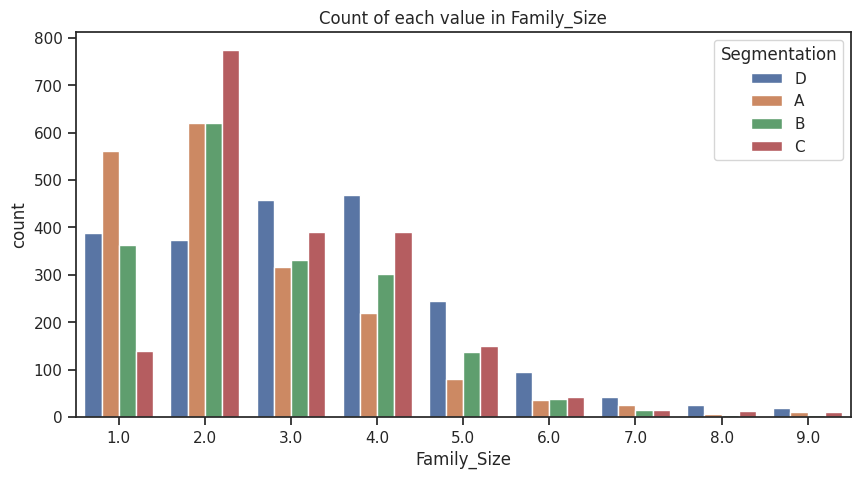

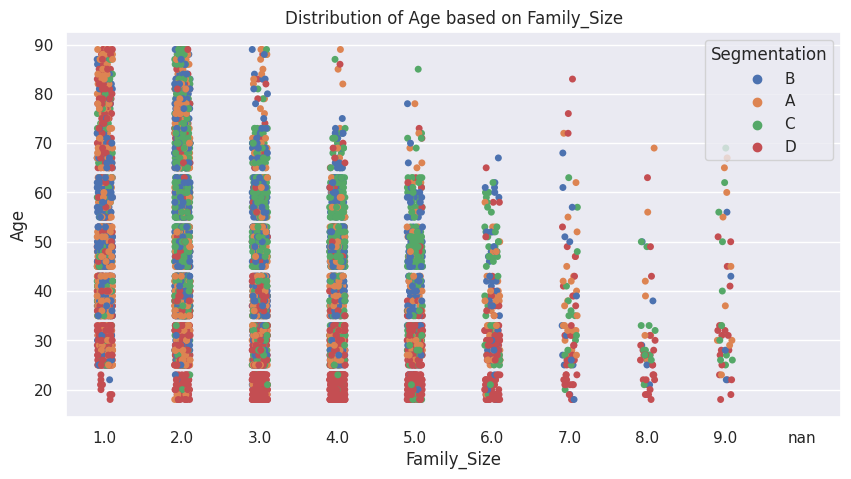

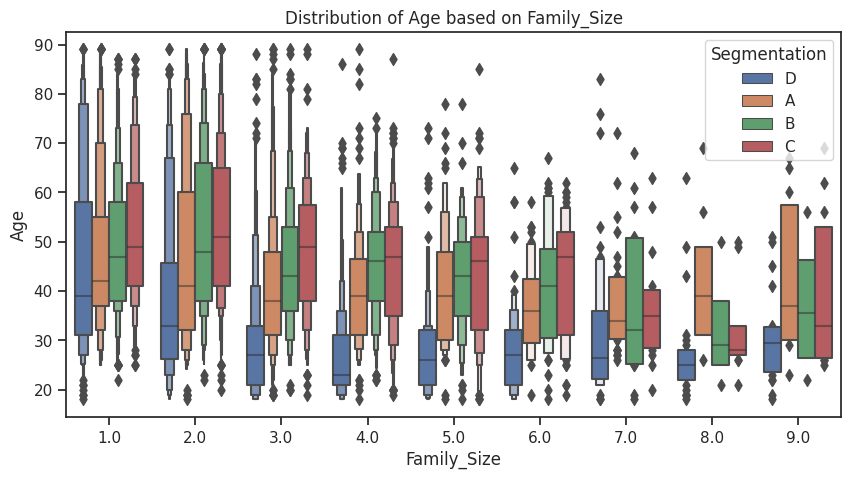

In [ ]:
plot_category(categorical=trainSet.Family_Size)

> + Form ***count plot***, the **Profession** can distinguish between many ***Segments***, in case the **Family Size** is
>> *1* then the ***Segments*** should be **A**
>>
>> *2* then the ***Segments*** should be **C**
> + From ***strip & boxen plots*** The distribution of **age** for each **category** can't distinguish between ***Segment*** using these 2-features.

### Var1

In [ ]:
trainSet.Var_1.unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

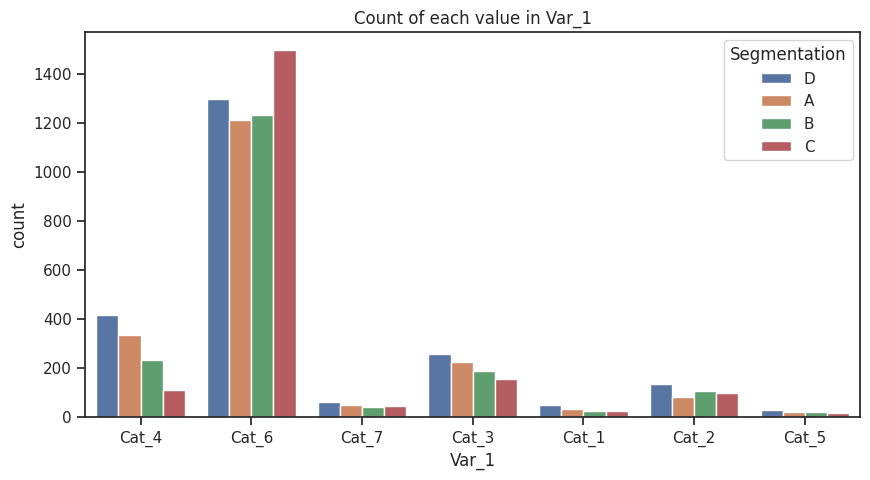

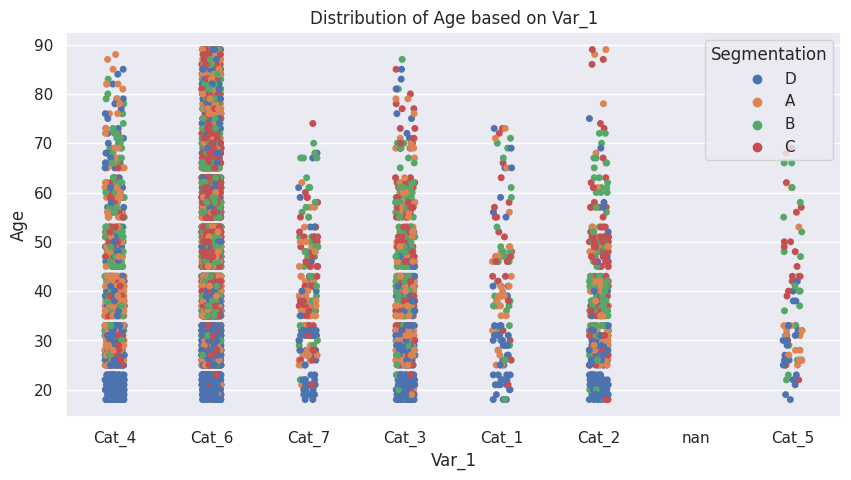

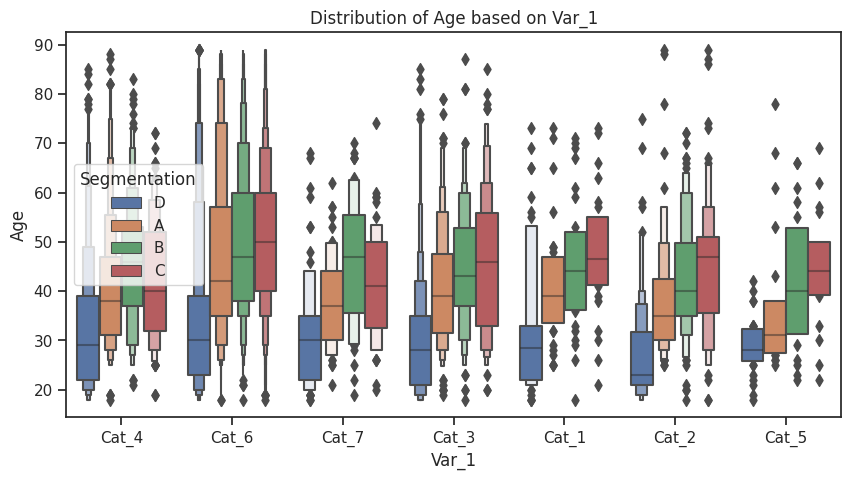

In [ ]:
plot_category(categorical=trainSet.Var_1)

> + Form ***count plot***, the **Var 1** can't distinguish between ***Segments***
> + From ***strip & boxen plots*** The distribution of **age** for each **category** can't distinguish between ***Segments*** using these 2-features.

## Observation
the Features that use to train model are 
* Ever Married
* Graduated
* Profession
* Spending_Score
* Family_Size
* Age
These feature can distinguish the **Segment D** quite clearly.

# Preprocessing

In [ ]:
trainSet = trainSet.loc[:, ['Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Family_Size', 'Age']]
testSet = testSet.loc[:, ['Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Family_Size', 'Age']]

In [ ]:
trainSet.head()

Ever_Married Graduated     Profession Spending_Score  Family_Size  Age
ID                                                                           
462809           No        No     Healthcare            Low          4.0   22
462643          Yes       Yes       Engineer        Average          3.0   38
466315          Yes       Yes       Engineer            Low          1.0   67
461735          Yes       Yes         Lawyer           High          2.0   67
462669          Yes       Yes  Entertainment           High          6.0   40

## Handle Missing Values

In [ ]:
trainSet.isnull().sum()

Ever_Married      140
Graduated          78
Profession        124
Spending_Score      0
Family_Size       335
Age                 0
dtype: int64

In [ ]:
testSet.isnull().sum()

Ever_Married       50
Graduated          24
Profession         38
Spending_Score      0
Family_Size       113
Age                 0
dtype: int64

### Further Analysis

In [ ]:
trainSet.groupby(['Ever_Married']).Graduated.value_counts()

Ever_Married  Graduated
No            Yes          1662
              No           1592
Yes           Yes          3240
              No           1360
Name: Graduated, dtype: int64

the most **Married**  customers are **graduated** ***70.43%***

In [ ]:
trainSet.groupby(['Spending_Score']).Graduated.value_counts()

Spending_Score  Graduated
Average         Yes          1450
                No            503
High            Yes           780
                No            425
Low             Yes          2738
                No           2094
Name: Graduated, dtype: int64

the most **Average** Spending Scores are **graduated** ***74.24%***

In [ ]:
# Handle Graduated
trainSet['Graduated'][(trainSet['Graduated'].isnull()) &  (trainSet['Spending_Score'] == 'Average')] = 'Yes'
trainSet['Graduated'][(trainSet['Graduated'].isnull())] = 'No'

testSet['Graduated'][(testSet['Graduated'].isnull()) &  (testSet['Spending_Score'] == 'Average')] = 'Yes'
testSet['Graduated'][(testSet['Graduated'].isnull())] = 'No'

<ipython-input-38-25a3e260dc71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainSet['Graduated'][(trainSet['Graduated'].isnull()) &  (trainSet['Spending_Score'] == 'Average')] = 'Yes'
<ipython-input-38-25a3e260dc71>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainSet['Graduated'][(trainSet['Graduated'].isnull())] = 'No'
<ipython-input-38-25a3e260dc71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testSet['Graduated'][(te

In [ ]:
trainSet.groupby(['Spending_Score']).Family_Size.value_counts()

Spending_Score  Family_Size
Average         2.0             813
                3.0             451
                4.0             434
                5.0             164
                6.0              47
                7.0              14
                1.0               7
                9.0               7
                8.0               6
High            2.0             585
                3.0             230
                4.0             213
                5.0              88
                6.0              25
                1.0              17
                7.0              12
                9.0              11
                8.0               6
Low             1.0            1429
                2.0             992
                3.0             816
                4.0             732
                5.0             360
                6.0             140
                7.0              70
                8.0              38
                9.0              26


In [ ]:
trainSet.groupby(['Ever_Married']).Family_Size.value_counts()

Ever_Married  Family_Size
No            1.0             858
              3.0             630
              4.0             608
              2.0             453
              5.0             315
              6.0             120
              7.0              59
              8.0              36
              9.0              22
Yes           2.0            1909
              3.0             834
              4.0             749
              1.0             571
              5.0             284
              6.0              87
              7.0              36
              9.0              22
              8.0              12
Name: Family_Size, dtype: int64

In [ ]:
# Handle Family Size
trainSet['Family_Size'][(trainSet['Family_Size'].isnull()) & (trainSet['Spending_Score'] == 'High')] = 2
trainSet['Family_Size'][(trainSet['Family_Size'].isnull()) & (trainSet['Ever_Married'] == 'Yes')] = 2
trainSet['Family_Size'][(trainSet['Family_Size'].isnull()) & (trainSet['Spending_Score'] == 'Low')] = 1

testSet['Family_Size'][(testSet['Family_Size'].isnull()) & (testSet['Spending_Score'] == 'High')] = 2
testSet['Family_Size'][(testSet['Family_Size'].isnull()) & (testSet['Ever_Married'] == 'Yes')] = 2
testSet['Family_Size'][(testSet['Family_Size'].isnull()) & (testSet['Spending_Score'] == 'Low')] = 1

<ipython-input-41-4d263d7e9085>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainSet['Family_Size'][(trainSet['Family_Size'].isnull()) & (trainSet['Spending_Score'] == 'High')] = 2
<ipython-input-41-4d263d7e9085>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainSet['Family_Size'][(trainSet['Family_Size'].isnull()) & (trainSet['Ever_Married'] == 'Yes')] = 2
<ipython-input-41-4d263d7e9085>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [ ]:
trainSet.groupby(['Ever_Married']).Profession.value_counts()

Ever_Married  Profession   
No            Healthcare       1153
              Artist            713
              Doctor            366
              Entertainment     358
              Engineer          267
              Marketing         189
              Homemaker         112
              Lawyer             40
              Executive          37
Yes           Artist           1774
              Entertainment     579
              Lawyer            575
              Executive         550
              Engineer          415
              Doctor            311
              Healthcare        145
              Homemaker         128
              Marketing          96
Name: Profession, dtype: int64

In [ ]:
trainSet.groupby(['Spending_Score']).Profession.value_counts()

Spending_Score  Profession   
Average         Artist           1011
                Entertainment     319
                Engineer          221
                Doctor            177
                Executive          75
                Homemaker          60
                Healthcare         42
                Lawyer             18
                Marketing          17
High            Executive         398
                Lawyer            324
                Artist            242
                Engineer           60
                Entertainment      46
                Healthcare         45
                Marketing          33
                Doctor             31
                Homemaker          26
Low             Artist           1263
                Healthcare       1245
                Entertainment     584
                Doctor            480
                Engineer          418
                Lawyer            281
                Marketing         242
                Home

In [ ]:
# Handle Profession
trainSet['Profession'][(trainSet['Profession'].isnull()) & ((trainSet['Ever_Married'] == 'Yes') | (trainSet['Spending_Score'] == 'Average'))] = 'Artist'
trainSet['Profession'][(trainSet['Profession'].isnull()) & (trainSet['Ever_Married'] == 'No')] = 'Healthcare'
trainSet['Profession'][(trainSet['Profession'].isnull()) & (trainSet['Spending_Score'] == 'High')] = 'Executive'

testSet['Profession'][(testSet['Profession'].isnull()) & ((testSet['Ever_Married'] == 'Yes') | (testSet['Spending_Score'] == 'Average'))] = 'Artist'
testSet['Profession'][(testSet['Profession'].isnull()) & (testSet['Ever_Married'] == 'No')] = 'Healthcare'
testSet['Profession'][(testSet['Profession'].isnull()) & (testSet['Spending_Score'] == 'High')] = 'Executive'

<ipython-input-44-573c0bb42319>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainSet['Profession'][(trainSet['Profession'].isnull()) & ((trainSet['Ever_Married'] == 'Yes') | (trainSet['Spending_Score'] == 'Average'))] = 'Artist'
<ipython-input-44-573c0bb42319>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainSet['Profession'][(trainSet['Profession'].isnull()) & (trainSet['Ever_Married'] == 'No')] = 'Healthcare'
<ipython-input-44-573c0bb42319>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
# Handle Ever Married
trainSet['Ever_Married'].replace(np.nan, trainSet['Ever_Married'].mode()[0], inplace=True)
testSet['Ever_Married'].replace(np.nan, testSet['Ever_Married'].mode()[0], inplace=True)

In [ ]:
trainSet.isnull().sum()

Ever_Married      0
Graduated         0
Profession        0
Spending_Score    0
Family_Size       0
Age               0
dtype: int64

In [ ]:
testSet.isnull().sum()

Ever_Married      0
Graduated         0
Profession        0
Spending_Score    0
Family_Size       0
Age               0
dtype: int64

## Hot Encoding

In [ ]:
trainSet = pd.get_dummies(trainSet, columns=['Ever_Married', 'Graduated', 'Profession'], drop_first=True)
trainSet['Spending_Score'].replace(['Low', 'Average', 'High'], [0,1,2], inplace=True)

testSet = pd.get_dummies(testSet, columns=['Ever_Married', 'Graduated', 'Profession'], drop_first=True)
testSet['Spending_Score'].replace(['Low', 'Average', 'High'], [0,1,2], inplace=True)

In [ ]:
trainCluster.replace(['A', 'B', 'C', 'D'], [0,1,2, 3], inplace=True)
testCluser.replace(['A', 'B', 'C', 'D'], [0,1,2, 3], inplace=True)

In [ ]:
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 462809 to 461879
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Spending_Score            8068 non-null   int64  
 1   Family_Size               8068 non-null   float64
 2   Age                       8068 non-null   int64  
 3   Ever_Married_Yes          8068 non-null   uint8  
 4   Graduated_Yes             8068 non-null   uint8  
 5   Profession_Doctor         8068 non-null   uint8  
 6   Profession_Engineer       8068 non-null   uint8  
 7   Profession_Entertainment  8068 non-null   uint8  
 8   Profession_Executive      8068 non-null   uint8  
 9   Profession_Healthcare     8068 non-null   uint8  
 10  Profession_Homemaker      8068 non-null   uint8  
 11  Profession_Lawyer         8068 non-null   uint8  
 12  Profession_Marketing      8068 non-null   uint8  
dtypes: float64(1), int64(2), uint8(10)
memory usage: 330.9 K

# Correlations

<Figure size 1500x500 with 0 Axes>

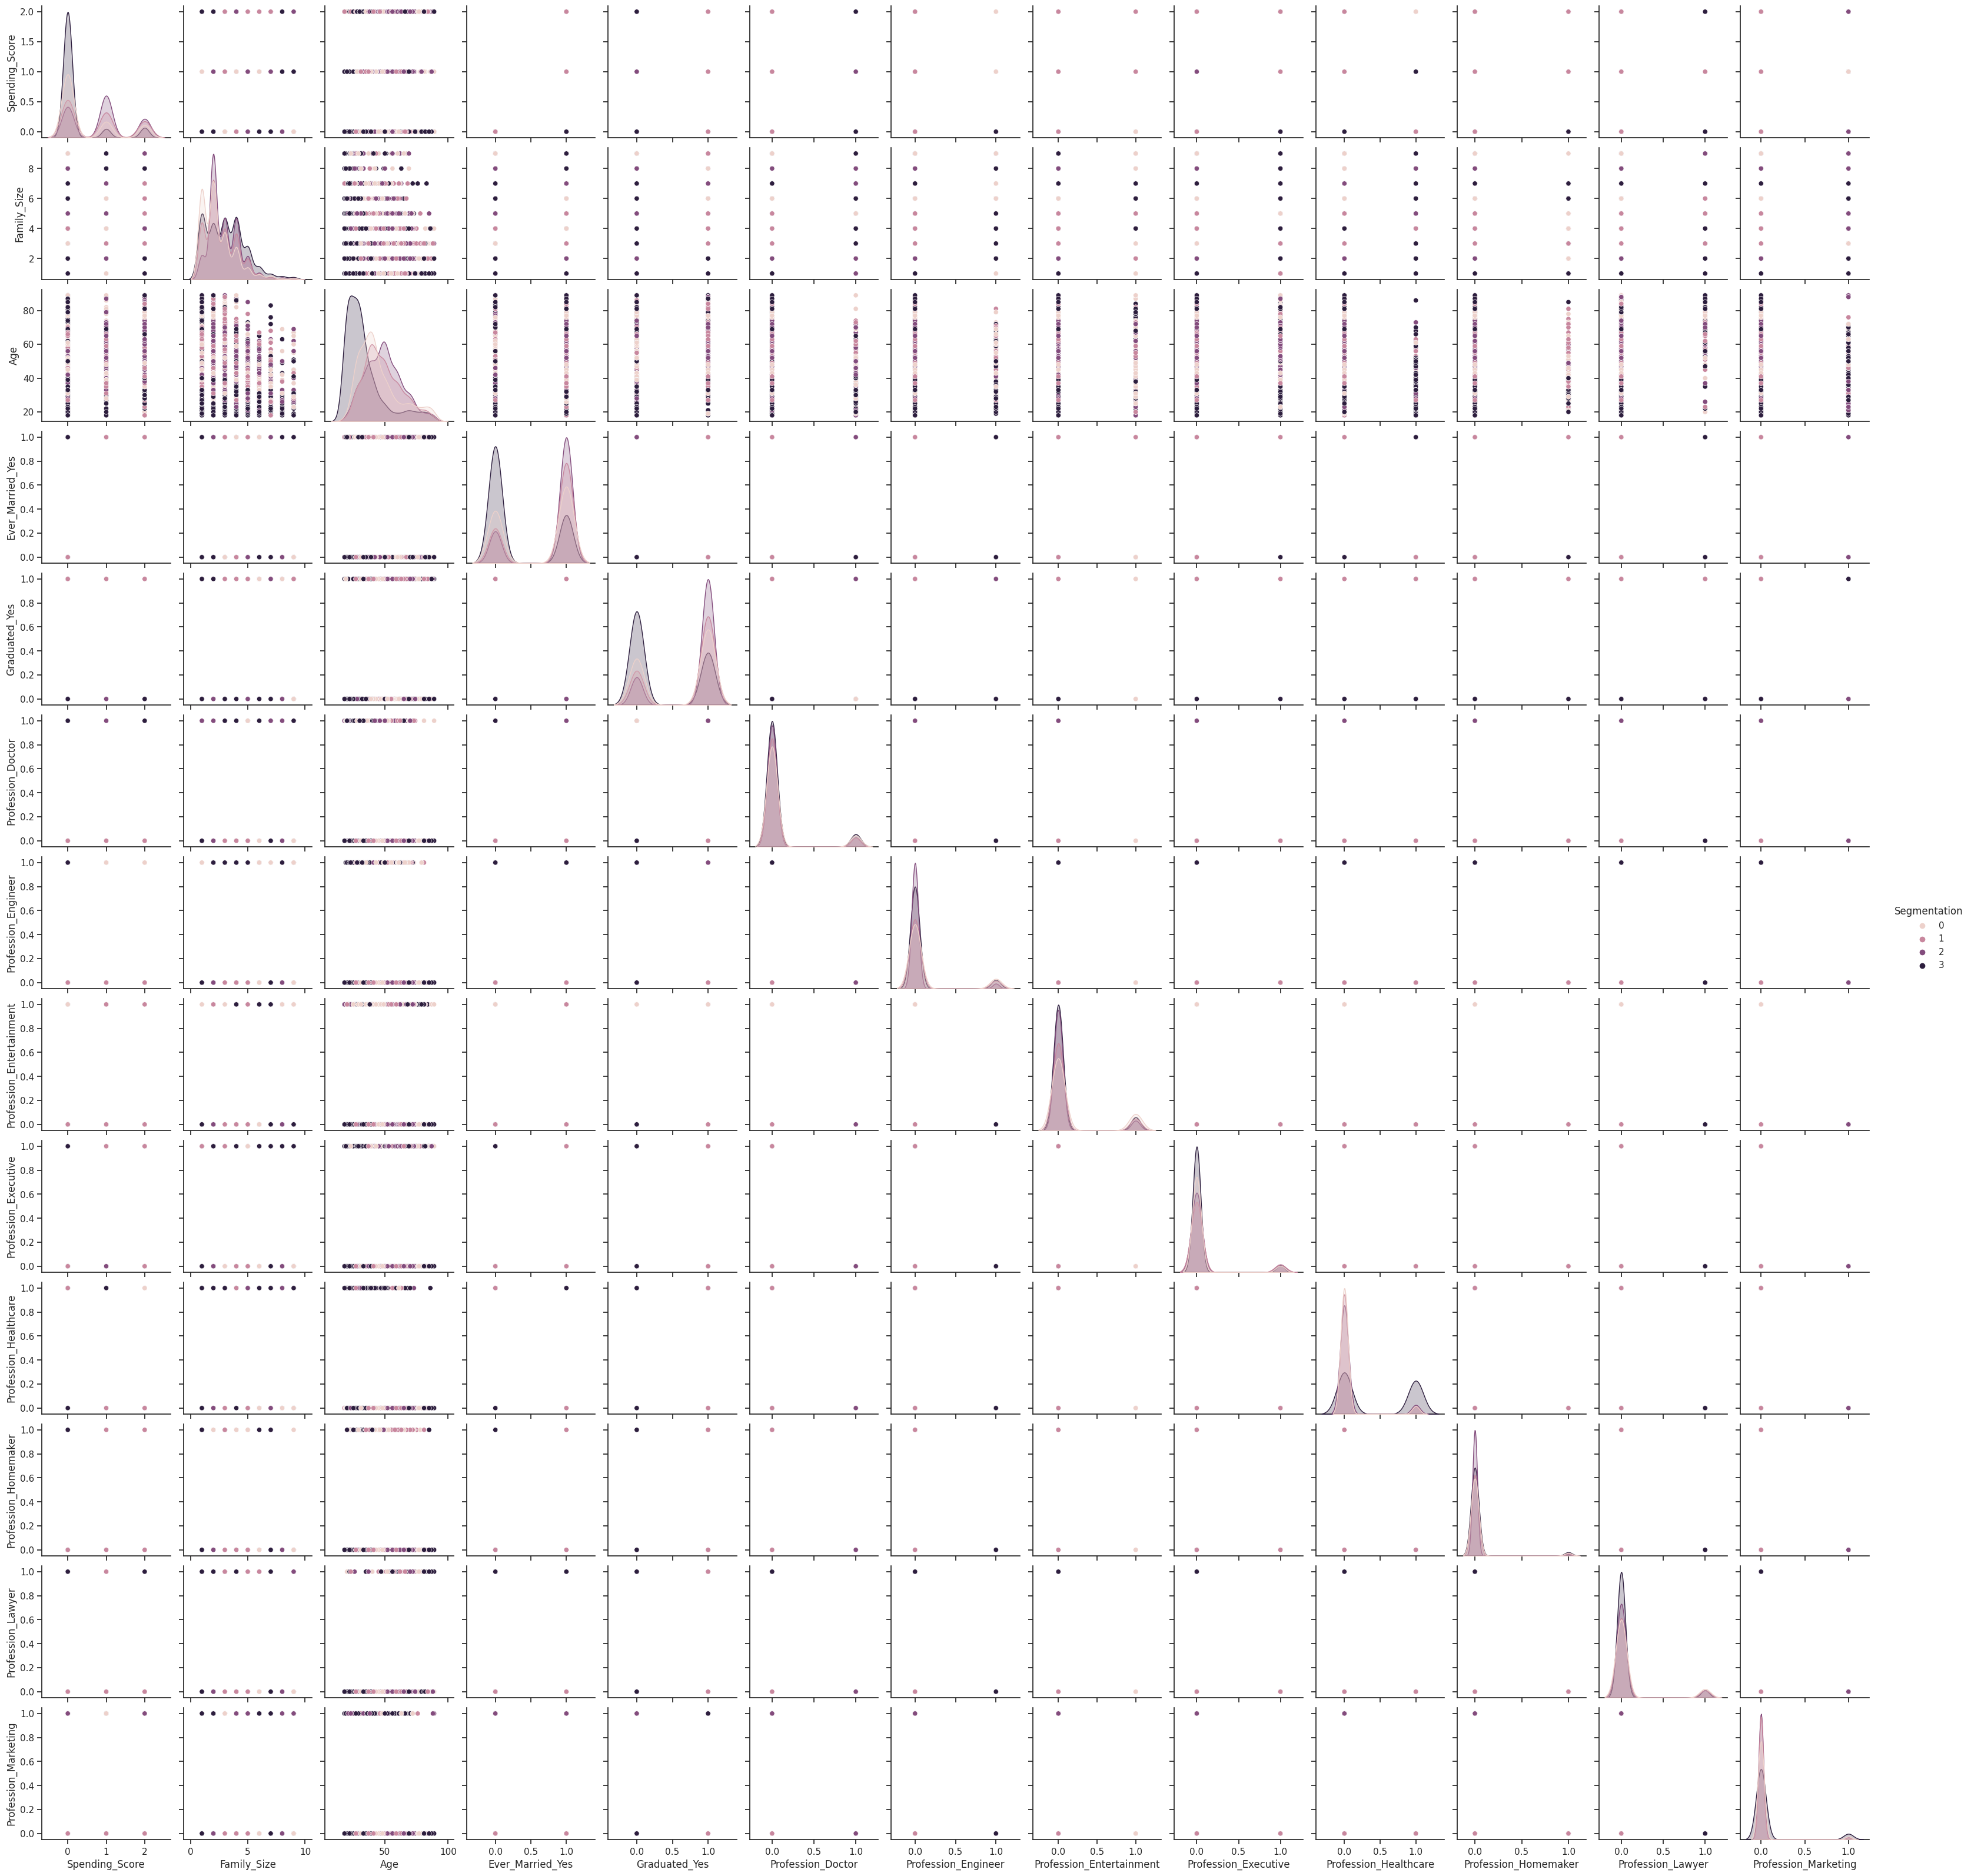

In [ ]:
py.figure(figsize=(15,5))
sb.pairplot(data=pd.concat([trainSet, trainCluster], axis=1), hue="Segmentation")

<Axes: >

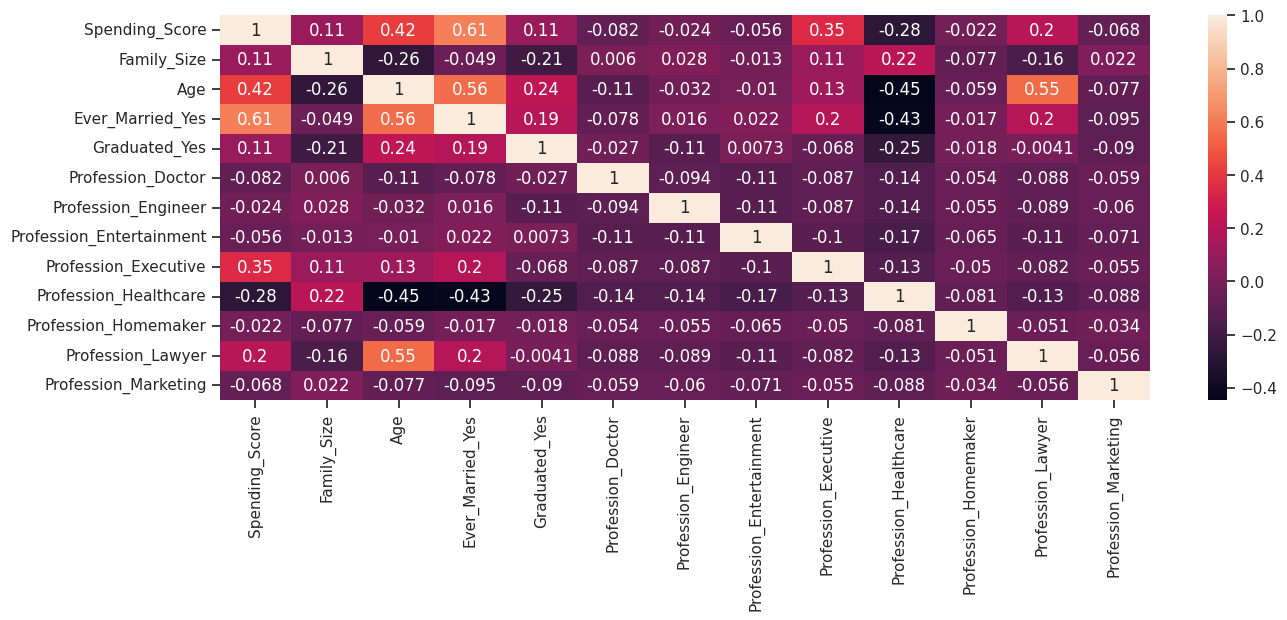

In [ ]:
py.figure(figsize=(15,5))
sb.heatmap(trainSet.corr(), annot=True)

Not found multicollinearity

# Model

In [ ]:
random_state = 45
max_itr = 500

## Clustering Models

In [ ]:
def kmean(trainset=trainSet, actualClusters=trainCluster, testset=testSet, testClusters=testCluser, type_='k-means++',  clusters=4):
    """
    Run Kmean on the dataset
    :param trainset: Train DataSet
    :param actualClusters: The actual segmentations in training set
    :param testset: Test DataSet
    :param testClusters: The actual segmentations in testing set
    :param type_: type of initiation of KMeans, ('random' | 'k-means++')
    :param clusters: number of clusters that KMeans groups the data to them
    :return: predicted labels of  training set, predicted labels of  testng set 
    """
    model = KMeans(n_clusters=clusters, init=type_, random_state=random_state, max_iter=max_itr)
    model.fit(trainset)
    preds = model.predict(trainset)
    preds_test = model.predict(testset)
    
    print("silhouette score Train =", silhouette_score(trainset, preds))
    print("silhouette score Test = ", silhouette_score(testset, preds_test))
    return preds, preds_test

In [ ]:
preds_train_or, preds_test_or = kmean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette score Train = 0.508249092499952
silhouette score Test =  0.5059655533603914


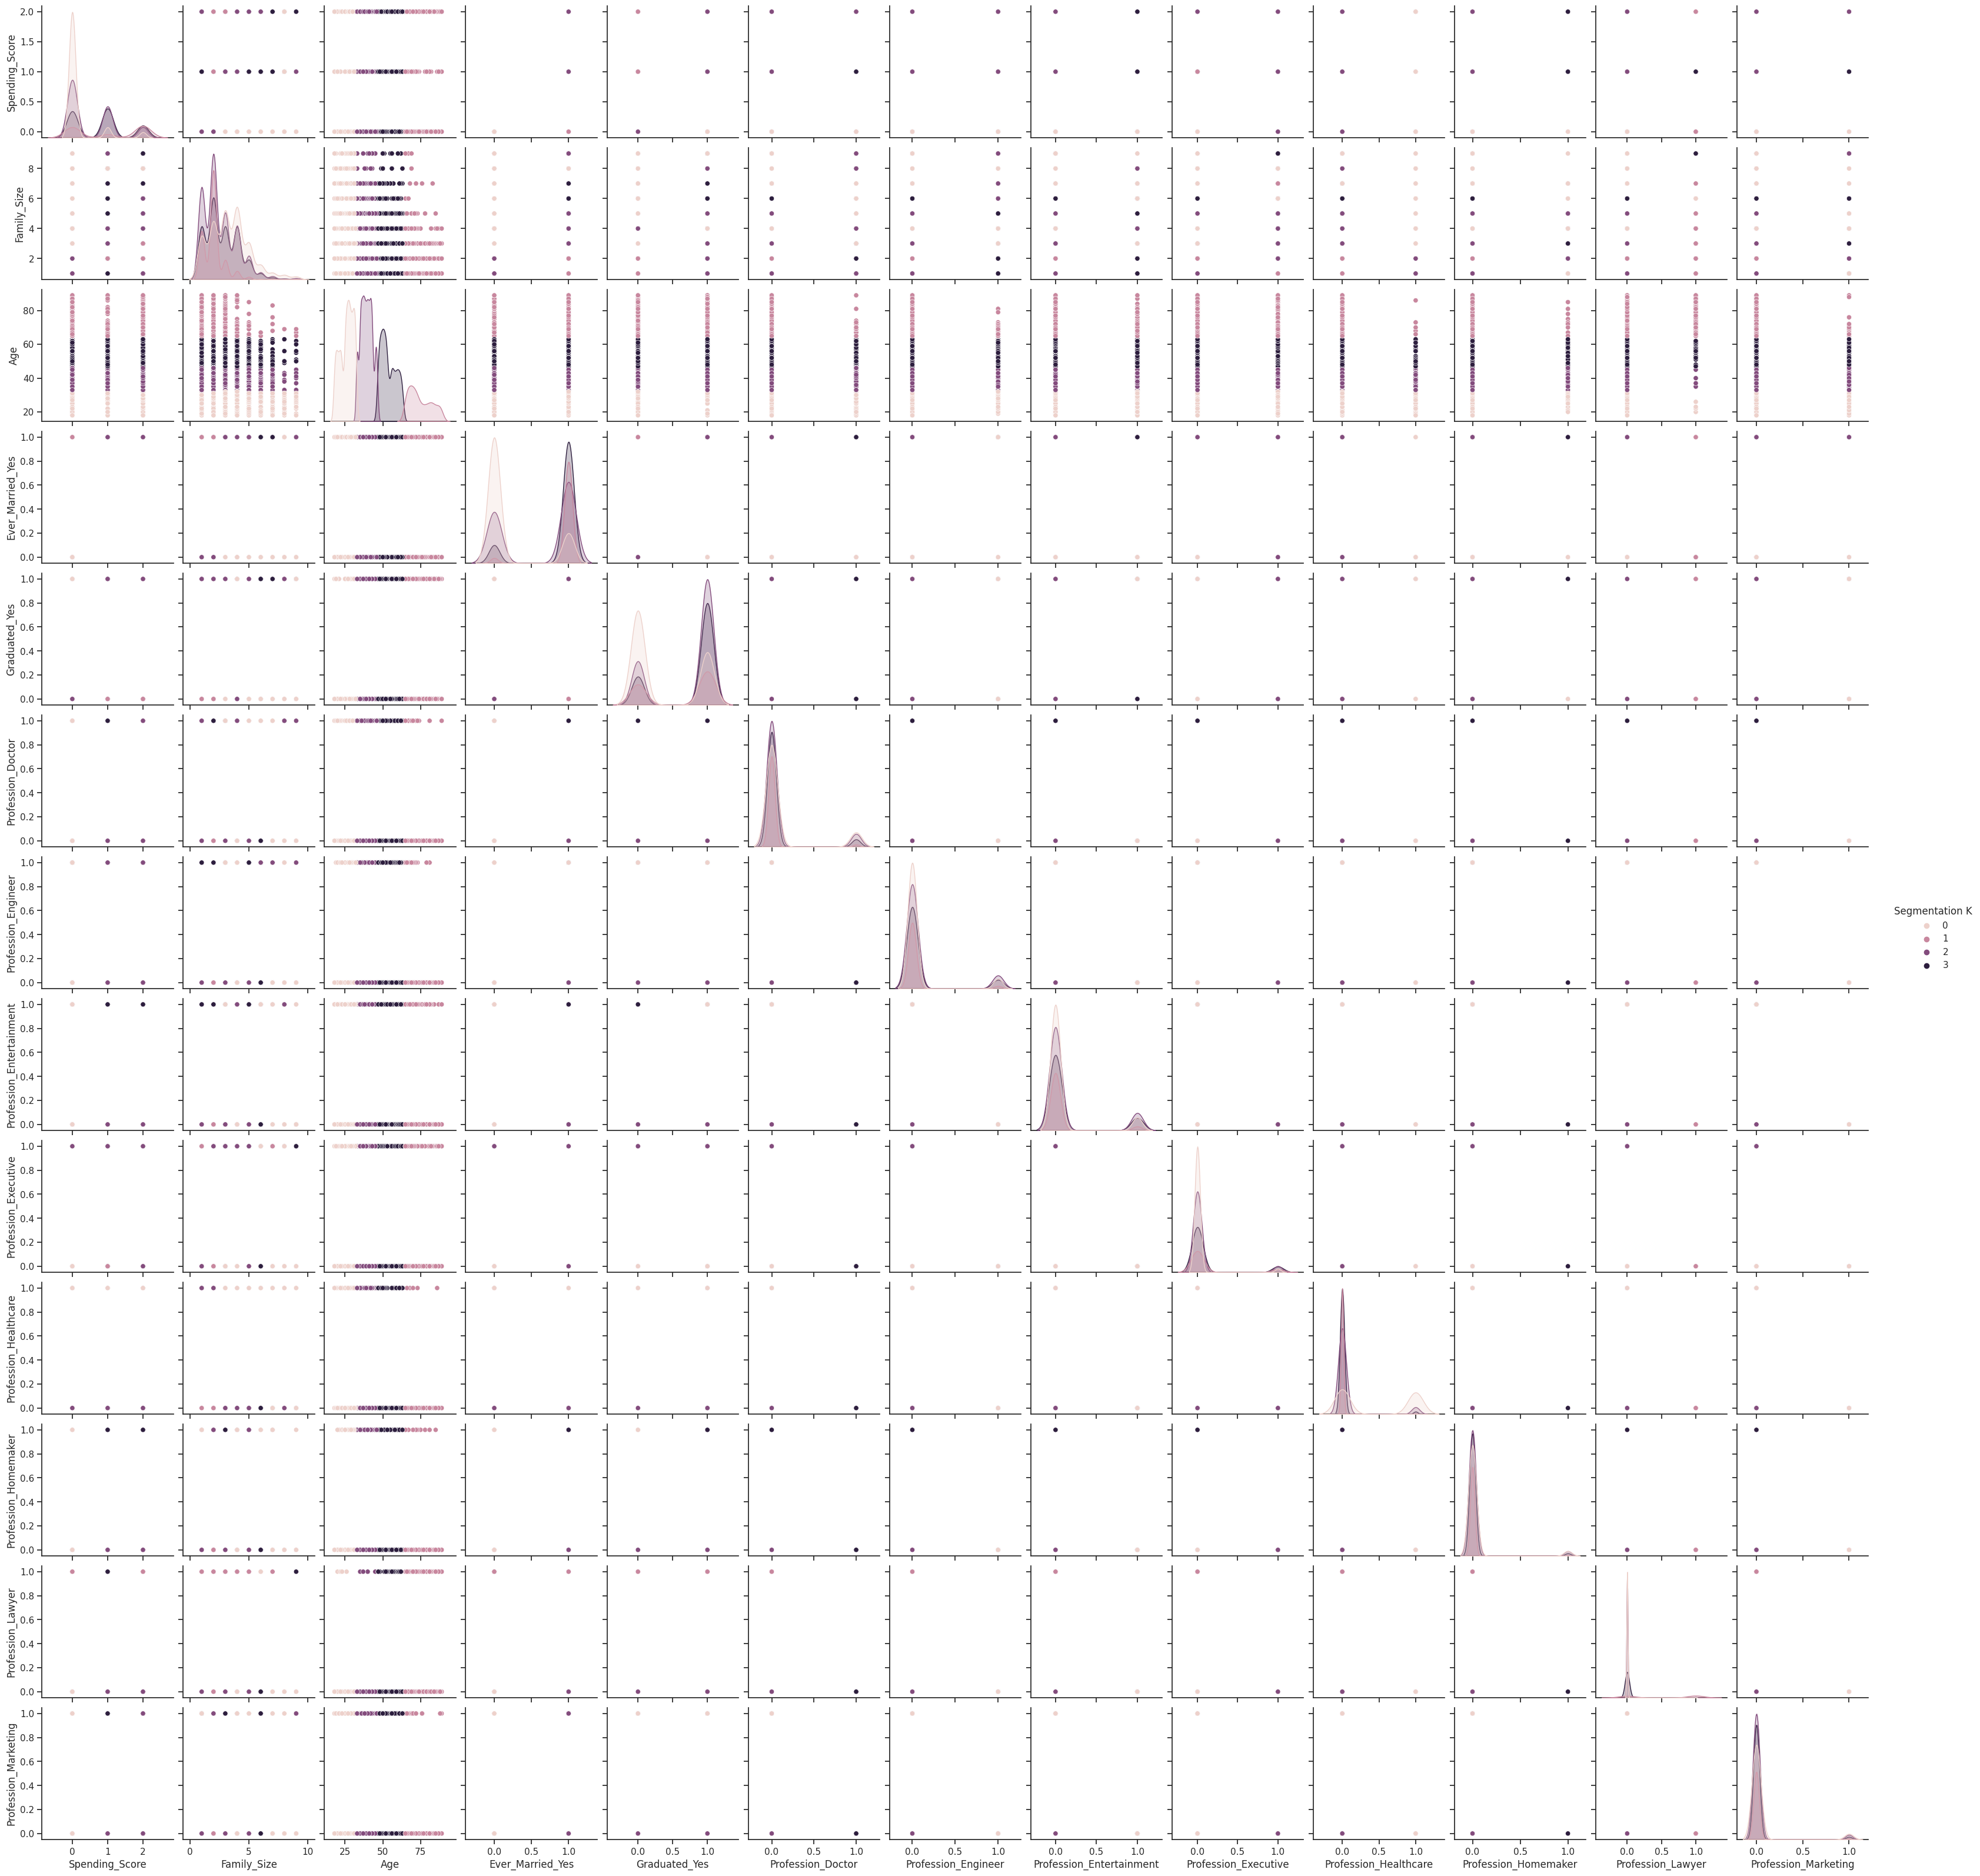

In [ ]:
sb.pairplot(data=pd.concat([trainSet, pd.Series(data=preds_train_or, name='Segmentation K', index= trainSet.index)], axis=1),  hue='Segmentation K')

The **Kmeans** splits the data in good way

#### Apply TSNA

In [ ]:
tsne = TSNE(random_state=random_state, init='pca')

In [ ]:
low_dim_tsne = pd.DataFrame(tsne.fit_transform(trainSet))
low_dim_tsne['Segmentation KMeans'] = preds_train_or

In [ ]:
low_dim_tsne_test = pd.DataFrame(tsne.fit_transform(testSet))
low_dim_tsne_test['Segmentation KMeans'] = preds_test_or

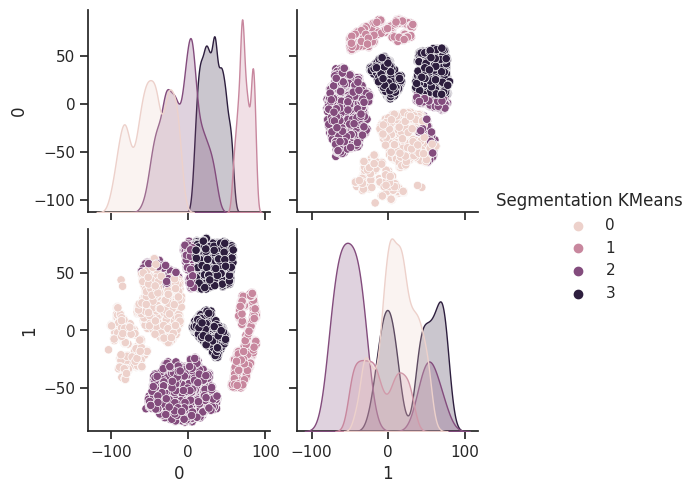

In [ ]:
sb.pairplot(data=low_dim_tsne.loc[:, [0,1, 'Segmentation KMeans']], hue='Segmentation KMeans')

### Observation 
**Kmeans** is good enough. on orginal DataSet

## Classification Models 

In [ ]:
def knn_fit(trainset=trainSet, trainClasess=trainCluster, testset=testSet, testClasses=testCluser):
    """
    To Chooce the best of k in  K-Nearest Neighbor
    :param trainset: Train DataSet
    :param trainClasess: The actual segmentations in training set
    :param testset: Test DataSet
    :param testClasses: The actual segmentations in testing set
    :return: None
    """
    train_error, test_error = [], []

    for k in range(3, 12, 2):
      model = KNeighborsClassifier(n_neighbors=k)
      model.fit(trainset, trainClasess)
      train_error.append(np.mean(model.predict(trainset) != trainClasess.values))
      test_error.append(np.mean(model.predict(testset) != testClasses.values))
      pass

    py.plot(range(3, 12, 2), train_error, label='Train Error') 
    py.plot(range(3, 12, 2), test_error, label='Test Error')
    py.xlabel('K values')
    py.ylabel('Error')
    py.legend()
    py.show()
    pass

def knn_apply(k, trainset=trainSet, trainClasess=trainCluster, testset=testSet, testClasses=testCluser):
    """
    Run K-Nearest Neighbor on the dataset
    :param k: Number of Nearest Neighbor for point
    :param trainset: Train DataSet
    :param trainClasess: The actual segmentations in training set
    :param testset: Test DataSet
    :param testClasses: The actual segmentations in testing set
    :return: model object
    """

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainset, trainClasess)

    preds_train = model.predict(trainset)
    print("In Train Set")
    print('\t\t Accuracy Score = ', accuracy_score(trainClasess, preds_train))
    ConfusionMatrixDisplay(confusion_matrix(trainClasess, preds_train)).plot()
    py.title("Display Confusion Matrix for Train Set")
    py.show()
    print('\t\t Classification Report = ', classification_report(trainClasess, preds_train))

    preds_test = model.predict(testset)
    print("In Test Set")
    print('\t\t Accuracy Score = ', accuracy_score(testClasses, preds_test))
    ConfusionMatrixDisplay(confusion_matrix(testClasses, preds_test)).plot()
    py.title("Display Confusion Matrix for Test Set")
    py.show()
    print('\t\t Classification Report = ', classification_report(testClasses, preds_test))
  
    return model

In [ ]:
def random_forest(trainset=trainSet, trainClasess=trainCluster, testset=testSet, testClasses=testCluser):
    """
    Run Random Forest on the dataset
    :param trainset: Train DataSet
    :param trainClasess: The actual segmentations in training set
    :param testset: Test DataSet
    :param testClasses: The actual segmentations in testing set
    :return: model object
    """
    model = RandomForestClassifier(random_state=random_state, n_estimators=300)
    model.fit(trainset, trainClasess)
    
    preds_train = model.predict(trainset)
    print("In Train Set")
    print('\t\t Accuracy Score = ', accuracy_score(trainClasess, preds_train))
    ConfusionMatrixDisplay(confusion_matrix(trainClasess, preds_train)).plot()
    py.title("Display Confusion Matrix for Train Set")
    py.show()
    print('\t\t Classification Report = ', classification_report(trainClasess, preds_train))

    preds_test = model.predict(testset)
    print("In Test Set")
    print('\t\t Accuracy Score = ', accuracy_score(testClasses, preds_test))
    ConfusionMatrixDisplay(confusion_matrix(testClasses, preds_test)).plot()
    py.title("Display Confusion Matrix for Test Set")
    py.show()
    print('\t\t Classification Report = ', classification_report(testClasses, preds_test))
    
    return model

In [ ]:
def svm(trainset=trainSet, trainClasess=trainCluster, testset=testSet, testClasses=testCluser):
    """
    Run Support Vector Machine on the dataset
    :param trainset: Train DataSet
    :param trainClasess: The actual segmentations in training set
    :param testset: Test DataSet
    :param testClasses: The actual segmentations in testing set
    :return: model object
    """
    model = SVC(C=0.8, probability=True, kernel='linear', random_state=random_state, max_iter=max_itr)
    model.fit(trainset, trainClasess)
    
    preds_train = model.predict(trainset)
    print("In Train Set")
    print('\t\t Accuracy Score = ', accuracy_score(trainClasess, preds_train))
    ConfusionMatrixDisplay(confusion_matrix(trainClasess, preds_train)).plot()
    py.title("Display Confusion Matrix for Train Set")
    py.show()
    print('\t\t Classification Report = ', classification_report(trainClasess, preds_train))

    preds_test = model.predict(testset)
    print("In Test Set")
    print('\t\t Accuracy Score = ', accuracy_score(testClasses, preds_test))
    ConfusionMatrixDisplay(confusion_matrix(testClasses, preds_test)).plot()
    py.title("Display Confusion Matrix for Test Set")
    py.show()
    print('\t\t Classification Report = ', classification_report(testClasses, preds_test))
    
    return model

In [ ]:
def adaboost(trainset=trainSet, trainClasess=trainCluster, testset=testSet, testClasses=testCluser):
    """
    Run Ada Boost on the dataset
    :param trainset: Train DataSet
    :param trainClasess: The actual segmentations in training set
    :param testset: Test DataSet
    :param testClasses: The actual segmentations in testing set
    :return: model object
    """
    model = AdaBoostClassifier(random_state=random_state, n_estimators=300)
    model.fit(trainset, trainClasess)
    
    preds_train = model.predict(trainset)
    print("In Train Set")
    print('\t\t Accuracy Score = ', accuracy_score(trainClasess, preds_train))
    ConfusionMatrixDisplay(confusion_matrix(trainClasess, preds_train)).plot()
    py.title("Display Confusion Matrix for Train Set")
    py.show()
    print('\t\t Classification Report = ', classification_report(trainClasess, preds_train))

    preds_test = model.predict(testset)
    print("In Test Set")
    print('\t\t Accuracy Score = ', accuracy_score(testClasses, preds_test))
    ConfusionMatrixDisplay(confusion_matrix(testClasses, preds_test)).plot()
    py.title("Display Confusion Matrix for Test Set")
    py.show()
    print('\t\t Classification Report = ', classification_report(testClasses, preds_test))
    
    return model

##### KNN 

with actual lables

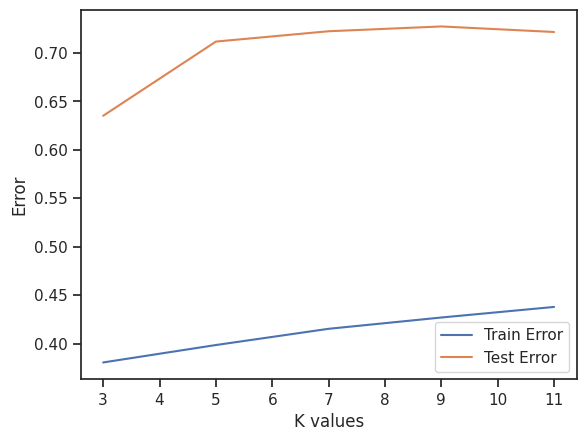

In [ ]:
knn_fit()

 with Kmeans lables

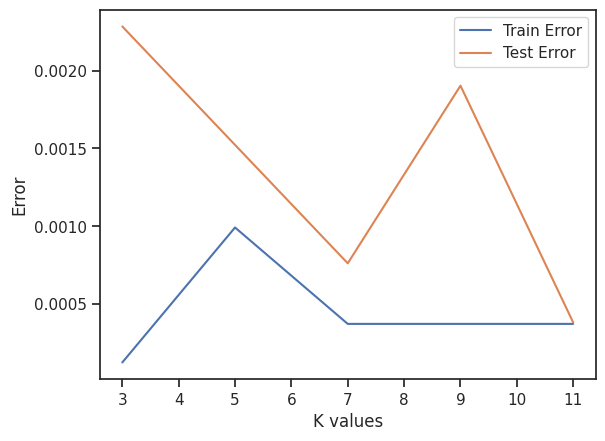

In [ ]:
knn_fit(trainClasess=pd.Series(preds_train_or), testClasses=pd.Series(preds_test_or))

In Train Set
		 Accuracy Score =  0.9996281606346058


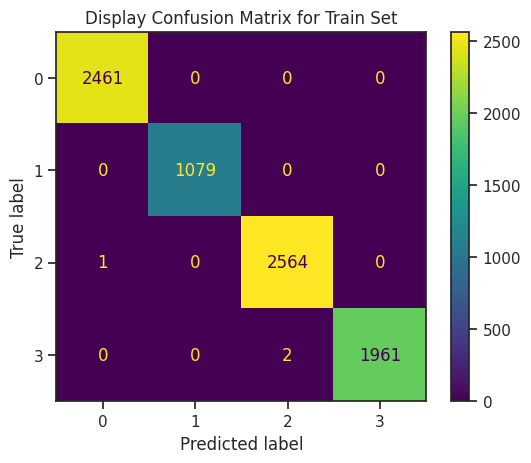

		 Classification Report =                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2461
           1       1.00      1.00      1.00      1079
           2       1.00      1.00      1.00      2565
           3       1.00      1.00      1.00      1963

    accuracy                           1.00      8068
   macro avg       1.00      1.00      1.00      8068
weighted avg       1.00      1.00      1.00      8068

In Test Set
		 Accuracy Score =  0.9996193376475067


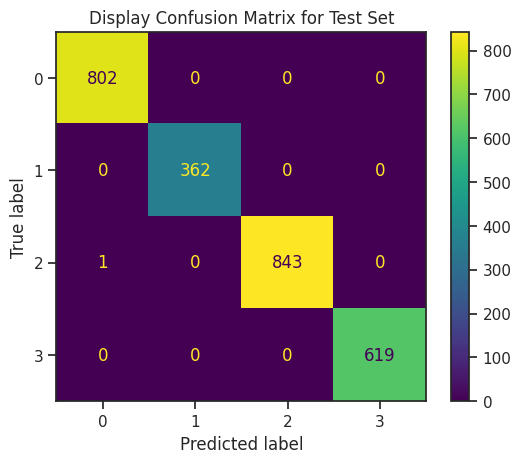

		 Classification Report =                precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       1.00      1.00      1.00       362
           2       1.00      1.00      1.00       844
           3       1.00      1.00      1.00       619

    accuracy                           1.00      2627
   macro avg       1.00      1.00      1.00      2627
weighted avg       1.00      1.00      1.00      2627



In [ ]:
knn_model = knn_apply(k=11, trainClasess=pd.Series(preds_train_or), testClasses=pd.Series(preds_test_or))

In Train Set
		 Accuracy Score =  1.0


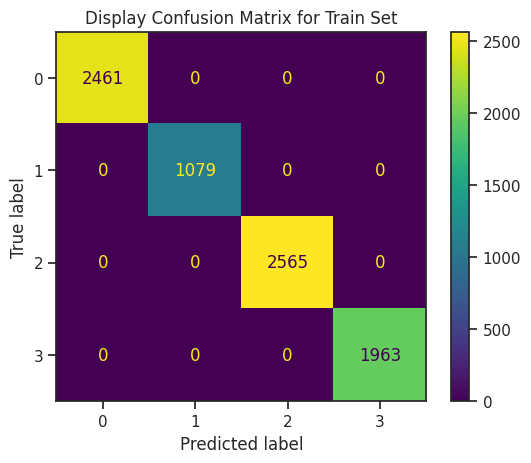

		 Classification Report =                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2461
           1       1.00      1.00      1.00      1079
           2       1.00      1.00      1.00      2565
           3       1.00      1.00      1.00      1963

    accuracy                           1.00      8068
   macro avg       1.00      1.00      1.00      8068
weighted avg       1.00      1.00      1.00      8068

In Test Set
		 Accuracy Score =  0.9996193376475067


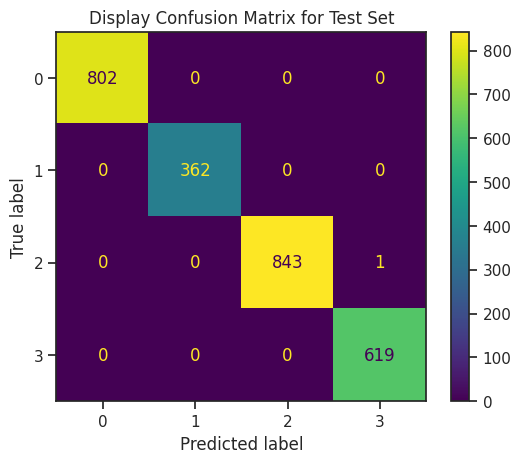

		 Classification Report =                precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       1.00      1.00      1.00       362
           2       1.00      1.00      1.00       844
           3       1.00      1.00      1.00       619

    accuracy                           1.00      2627
   macro avg       1.00      1.00      1.00      2627
weighted avg       1.00      1.00      1.00      2627



RandomForestClassifier(n_estimators=300, random_state=45)

In [73]:
random_forest(trainClasess=pd.Series(preds_train_or), testClasses=pd.Series(preds_test_or))

In Train Set
		 Accuracy Score =  1.0


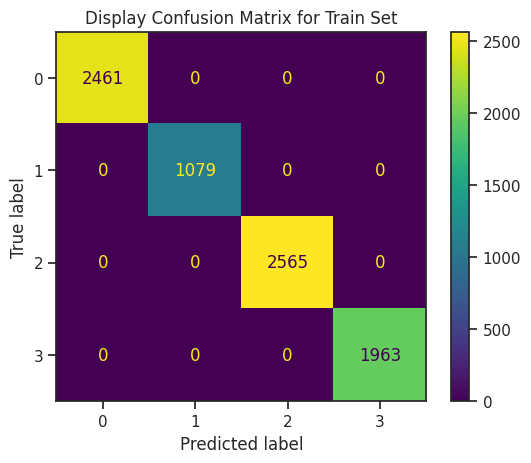

		 Classification Report =                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2461
           1       1.00      1.00      1.00      1079
           2       1.00      1.00      1.00      2565
           3       1.00      1.00      1.00      1963

    accuracy                           1.00      8068
   macro avg       1.00      1.00      1.00      8068
weighted avg       1.00      1.00      1.00      8068

In Test Set
		 Accuracy Score =  1.0


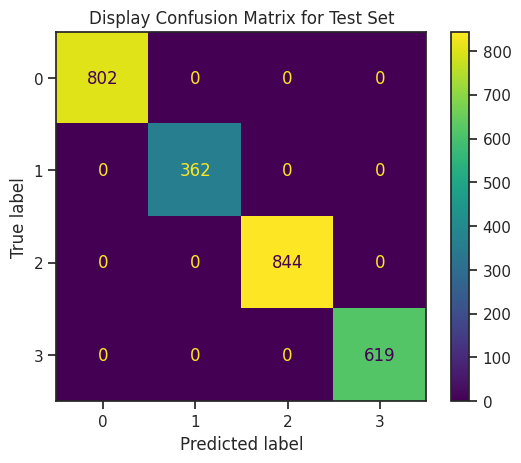

		 Classification Report =                precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       1.00      1.00      1.00       362
           2       1.00      1.00      1.00       844
           3       1.00      1.00      1.00       619

    accuracy                           1.00      2627
   macro avg       1.00      1.00      1.00      2627
weighted avg       1.00      1.00      1.00      2627



SVC(C=0.8, kernel='linear', max_iter=500, probability=True, random_state=45)

In [74]:
svm(trainClasess=pd.Series(preds_train_or), testClasses=pd.Series(preds_test_or))

#### Observation
Original Data is not distributed properly to the actual segments. i.e there are no patterns. 

**`But the Kmeans groups the data well`**.

This is shown in the classification algorithms' handling of them.